# Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('flight_price.xlsx')

## Data Cleaning

In [3]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]
df['Day']=df['Day'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)
df.drop('Dep_Time',axis=1,inplace=True)
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df.drop('Arrival_Time',axis=1,inplace=True)
df['Duration_hours']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_minutes']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]
df.at[6474,'Duration_hours']=5 #replacing a value at 6474 index with 5
df['Duration_minutes'].fillna(0,inplace=True)
df['Duration_minutes']=df['Duration_minutes'].astype(int)
df['Duration_hours']=df['Duration_hours'].astype(int)

In [4]:
df.shape

(10683, 18)

The dataset have 10683 rows and 11 columns

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

<Axes: xlabel='Price', ylabel='Count'>

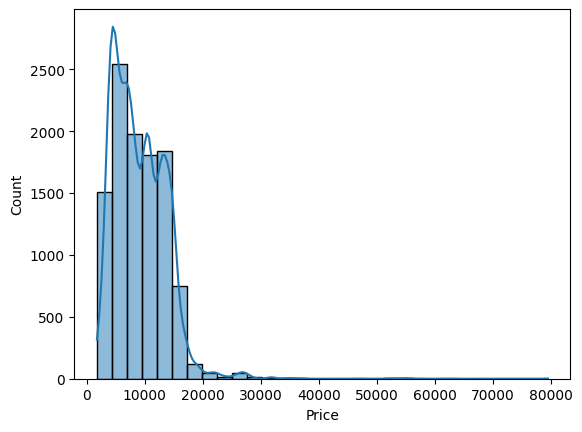

In [5]:
sns.histplot(x='Price',data=df,bins=30,kde=True)

The flight follows Poisson distribution

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [6]:
print(f"The Range of prices in the dataset is {df['Price'].min(),df['Price'].max()}")

The Range of prices in the dataset is (1759, 79512)


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

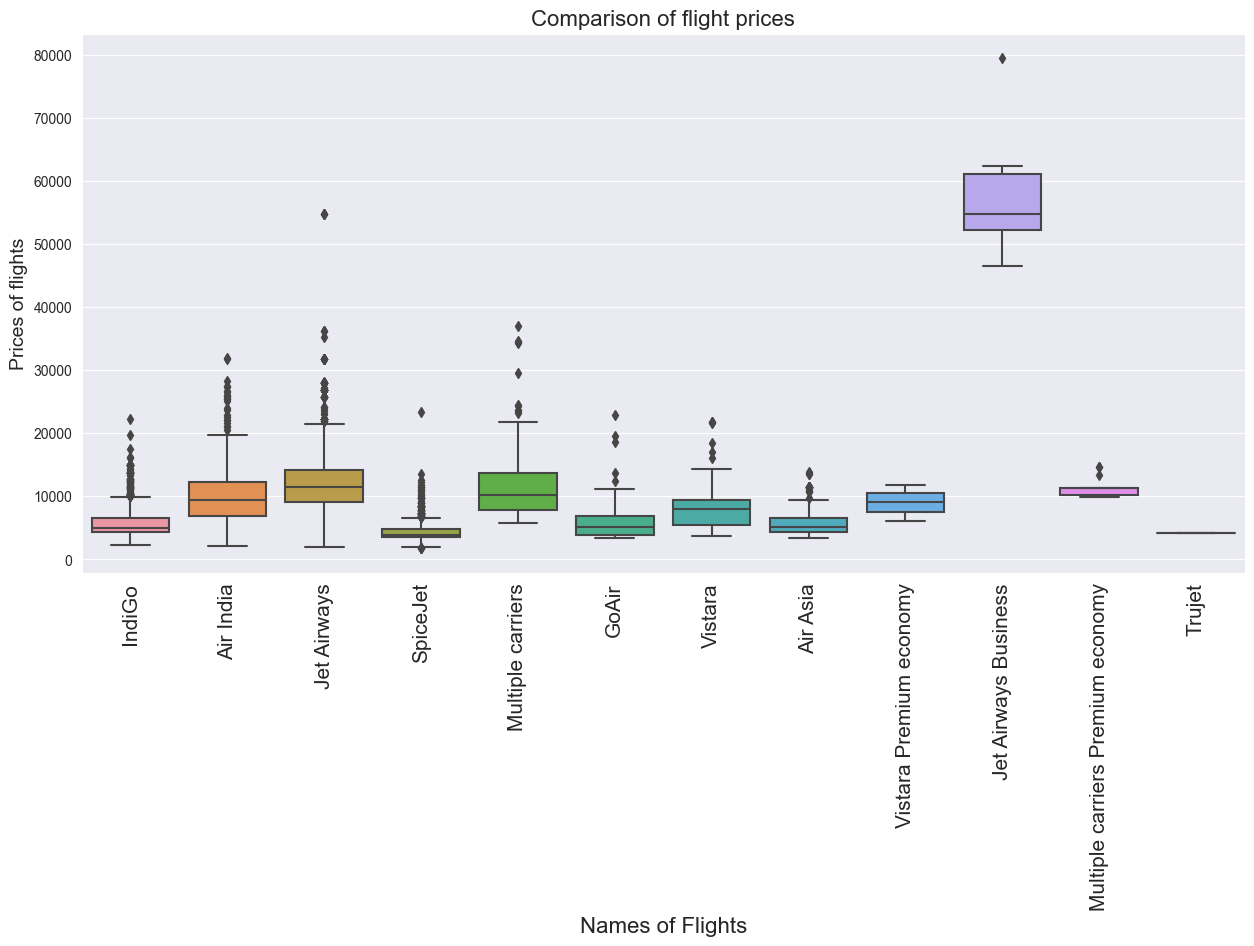

In [7]:
plt.figure(figsize=(15,7))
sns.set_style('darkgrid')
sns.set_palette('Spectral')

sns.boxplot(x='Airline',y='Price',data=df)

plt.title('Comparison of flight prices',fontsize=16)
plt.xlabel('Names of Flights',fontsize=16)
plt.ylabel('Prices of flights',fontsize=14)
plt.xticks(rotation=90,fontsize=15)
plt.show()

- Except Vistara Premium economy, all flights containes outliers
- The price of Jet Airways Business is highest
- The mean price of almost all the flights ranges between 5k to 10k

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

The outliers are present in the 'Price' feature of dataset. It can affect the analysis in many ways.
- The boxplot of price is being plotted above
1. Bias the mean and standard deviation: Outliers can skew the mean and standard deviation.
2. Influencing statistical tests: Many statistical tests are sensitive to outliers which can affect the results of tests

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

To identify the peak travel season we can analyze the Date_of_Journey feature. To do that first we should convert it into integer by separating it into day,month and year columns

In [8]:
df['Year'].value_counts()

Year
2019    10683
Name: count, dtype: int64

In [9]:
x=df.groupby(['Month'])['Price'].sum().keys()
y=df.groupby(['Month'])['Price'].sum().values

In [10]:
x,y

(Index([3, 4, 5, 6], dtype='int32', name='Month'),
 array([29073812,  6226744, 31635040, 30141510], dtype=int64))

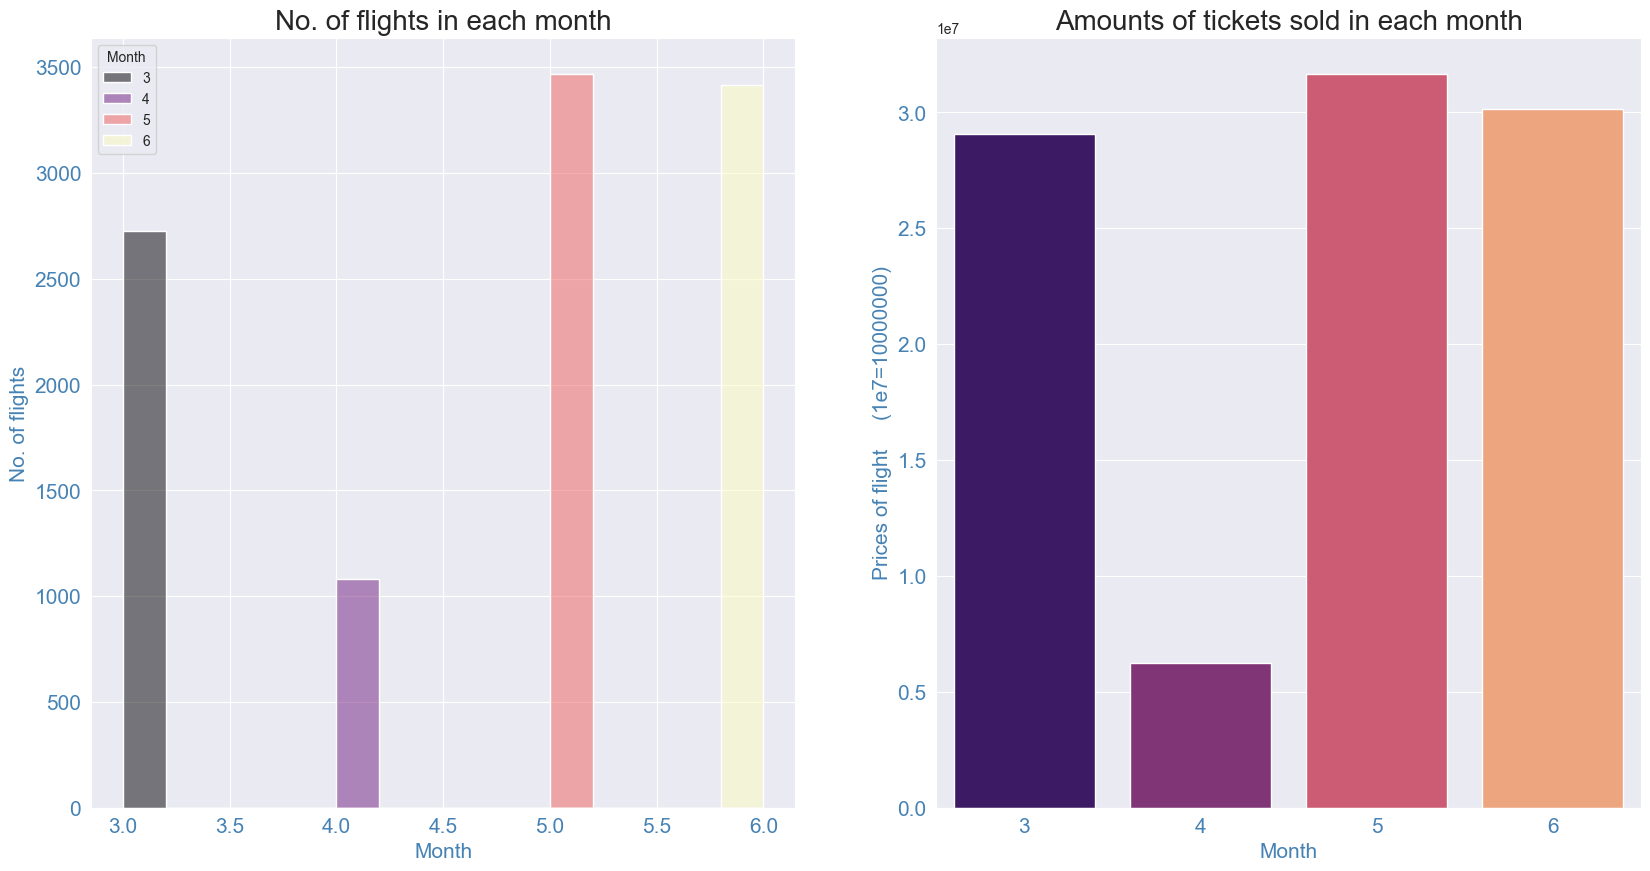

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(121)

sns.histplot(x='Month',data=df,palette='magma',hue='Month')
plt.title('No. of flights in each month',fontsize=20)
plt.xlabel('Month',fontsize=15,color='steelblue')
plt.ylabel('No. of flights',fontsize=15,color='steelblue')
plt.xticks(fontsize=15,color='steelblue')
plt.yticks(fontsize=15,color='steelblue')
plt.subplot(122)
    
sns.barplot(x=x,y=y,palette='magma')
plt.title('Amounts of tickets sold in each month',fontsize=20)
plt.xticks(fontsize=15,color='steelblue')
plt.yticks(fontsize=15,color='steelblue')
plt.xlabel('Month',fontsize=15,color='steelblue')
plt.ylabel('Prices of flight     (1e7=10000000)',fontsize=15,color='steelblue')
plt.show()

## Report

- The majority of flights occur during the 5th and 6th months.
- The highest number of tickets are being sold in 5th and 6th months

### Conclusion
- **We can conclude that 5th and 6th months are the peak season to travel**

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10 22 Mar,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25 10 Jun,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Duration_hours,Duration_minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10 22 Mar,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25 10 Jun,9,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


In [14]:
avg_price_month=df.groupby(['Month'])['Price'].mean()
avg_price_airline=df.groupby(['Airline'])['Price'].mean()

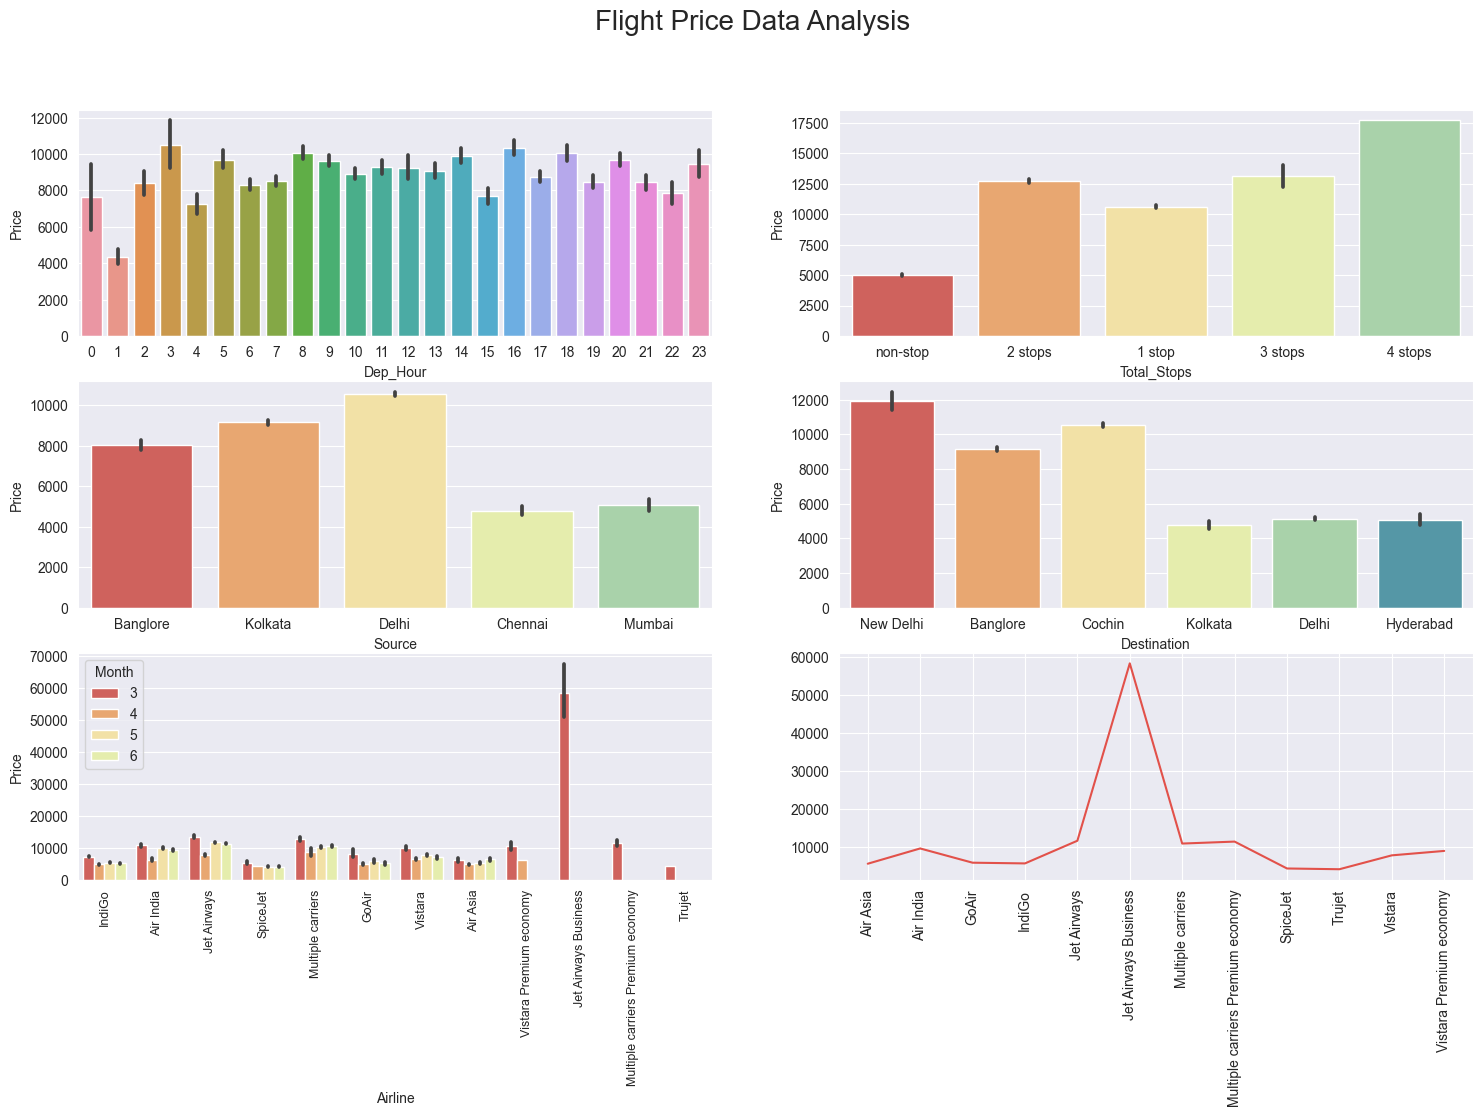

In [15]:
plt.figure(figsize=(18,10))
plt.suptitle('Flight Price Data Analysis',fontsize=20)

plt.subplot(321)
sns.barplot(x='Dep_Hour',y='Price',data=df)

plt.subplot(322)
sns.barplot(x='Total_Stops',y='Price',data=df)

plt.subplot(323)
sns.barplot(x='Source',y='Price',data=df)

plt.subplot(324)
sns.barplot(x='Destination',y='Price',data=df)

plt.subplot(325)
sns.barplot(x='Airline',y='Price',data=df,hue='Month')
plt.xticks(rotation=90)
plt.xticks(fontsize=9)

plt.subplot(326)
plt.plot(avg_price_airline)
plt.xticks(rotation=90)

plt.show()

## Report
- The prices of the flight departed at 01,04,15 hrs are cheapest while flights departed at 03,16,8 hours are expensive
- As the number of stops increases, the prices also increase
- Flights which arrived from Banglore, Kolkata and Delhi are most expensive
- The average price of flight in 4th month was least while in 3rd month, it is highest
- The average price of Jet Airways Business class flight is highest

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

Ans.The factors that affect the flight prices are: Month, Airline, Source airport and departing time. The visualization prepared in above question are the findings I will present to management team

# Google Playstore:

In [16]:
df1=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [17]:
print(f"The dimensions of Google Playstore dataset are {df1.shape}")

The dimensions of Google Playstore dataset are (10841, 13)


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

In [18]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


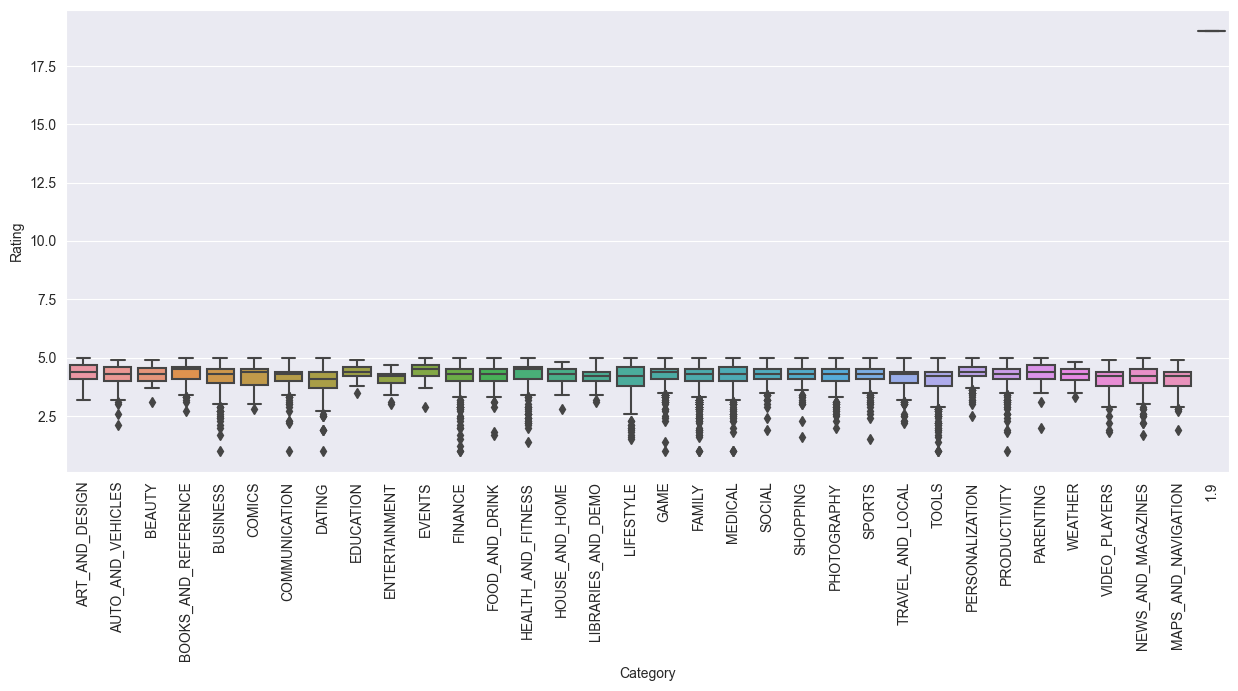

In [19]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Category',y='Rating',data=df1)
plt.xticks(rotation=90)
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [20]:
print(f"The number of missing values in each category are:\n{df1.isnull().sum()}")

The number of missing values in each category are:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


These missing values can affect the analysis in many ways:
- Missing values in Rating columns can create bias in result: If the missing values are not missing at random then they can introduce bias into the result. For example, if missing values are more likely to be for apps that have been rated poorly, then deleting them can make the result appear to be more positive than they actually are.
- Missing values in Current version and android version can make it difficult to track the evolution of apps

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [21]:
sort_size=df1['Size'].sort_values()

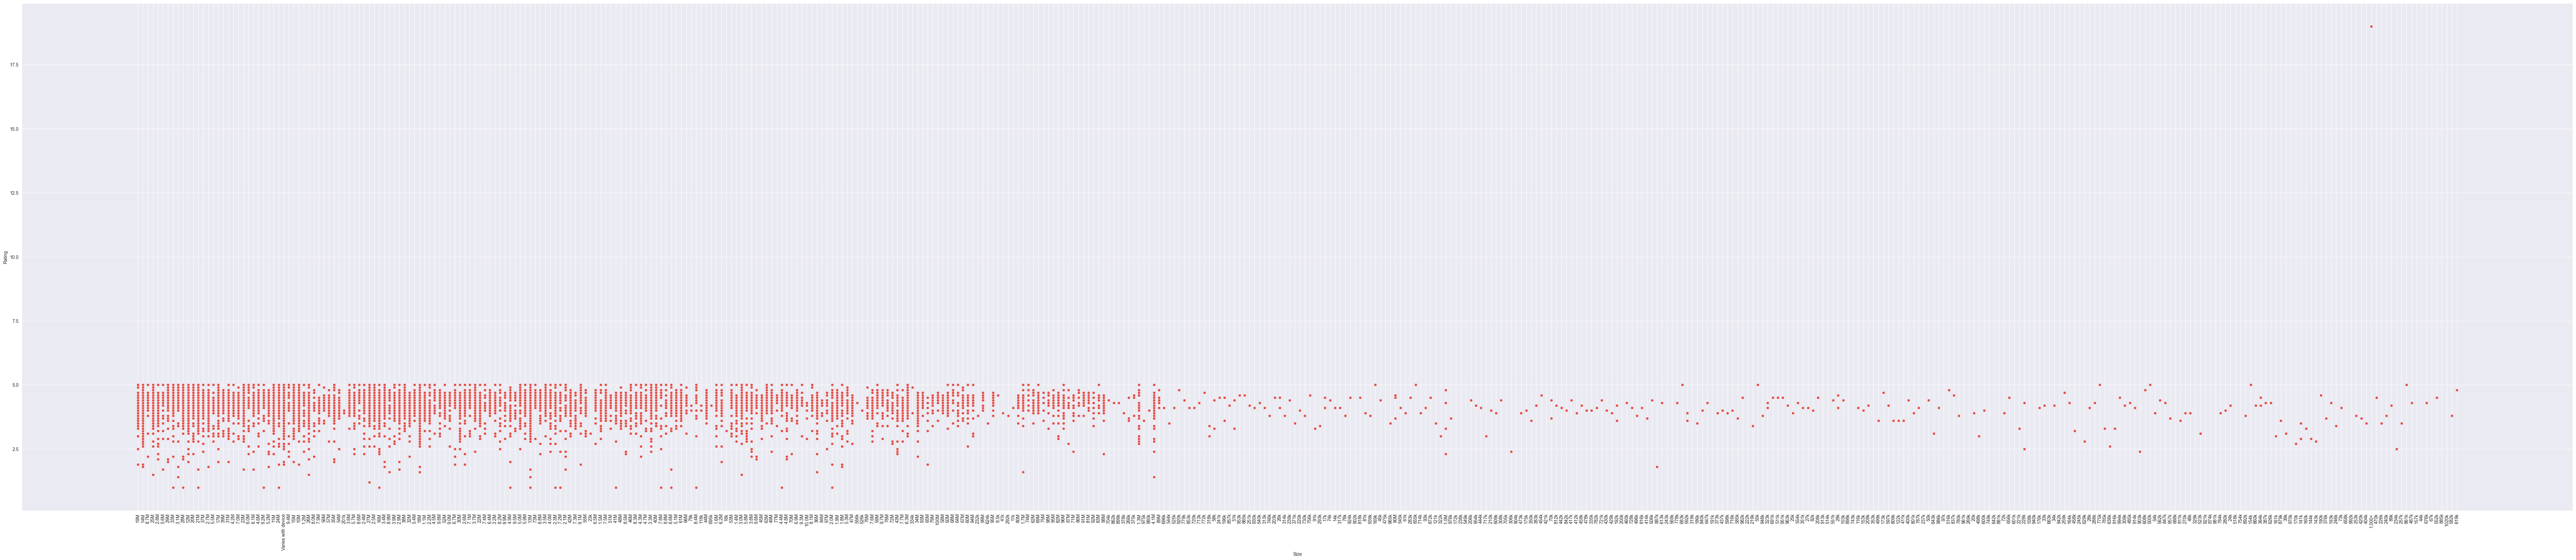

In [22]:
plt.figure(figsize=(100,20))
sns.scatterplot(x=sort_size,y='Rating',data=df1)
plt.xticks(rotation=90)
plt.show()

The average rating of almost all the apps is equal, that's why there is no significant relationship between size and rating of apps

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

In [23]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
df1['Price']=df1['Price'].str.split('$').str[1]

In [25]:
df1['Price']=df1['Price'].fillna(0)

In [26]:
df1['Price']=df1['Price'].astype(float)

In [27]:
df1['Price'].dtype

dtype('float64')

<Axes: xlabel='Type', ylabel='Price'>

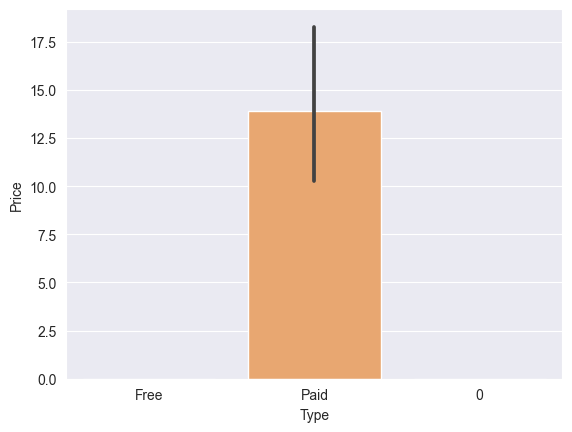

In [28]:
sns.barplot(x='Type',y='Price',data=df1)

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [29]:
popular_apps=df1[['Installs','App']].sort_values(by='Installs',ascending=False)[:11]

In [30]:
popular_apps['Installs']=popular_apps['Installs'].str.split('+').str[0].str.replace(',','')

In [31]:
popular_apps=popular_apps.drop(axis=1,index=10472) # Dropoing this row because it contans a value 'Free' which can't be converted to int

In [32]:
popular_apps # These are the most popular apps in Dataset

,Installs,App
420,500000000,UC Browser - Fast Download Private & Secure
474,500000000,LINE: Free Calls & Messages
3767,500000000,Flipboard: News For Our Time
3574,500000000,Cloud Print
3326,500000000,Gboard - the Google Keyboard
431,500000000,Viber Messenger
4222,500000000,imo free video calls and chat
3235,500000000,Google Translate
1842,500000000,Candy Crush Saga
4005,500000000,Clean Master- Space Cleaner & Antivirus


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

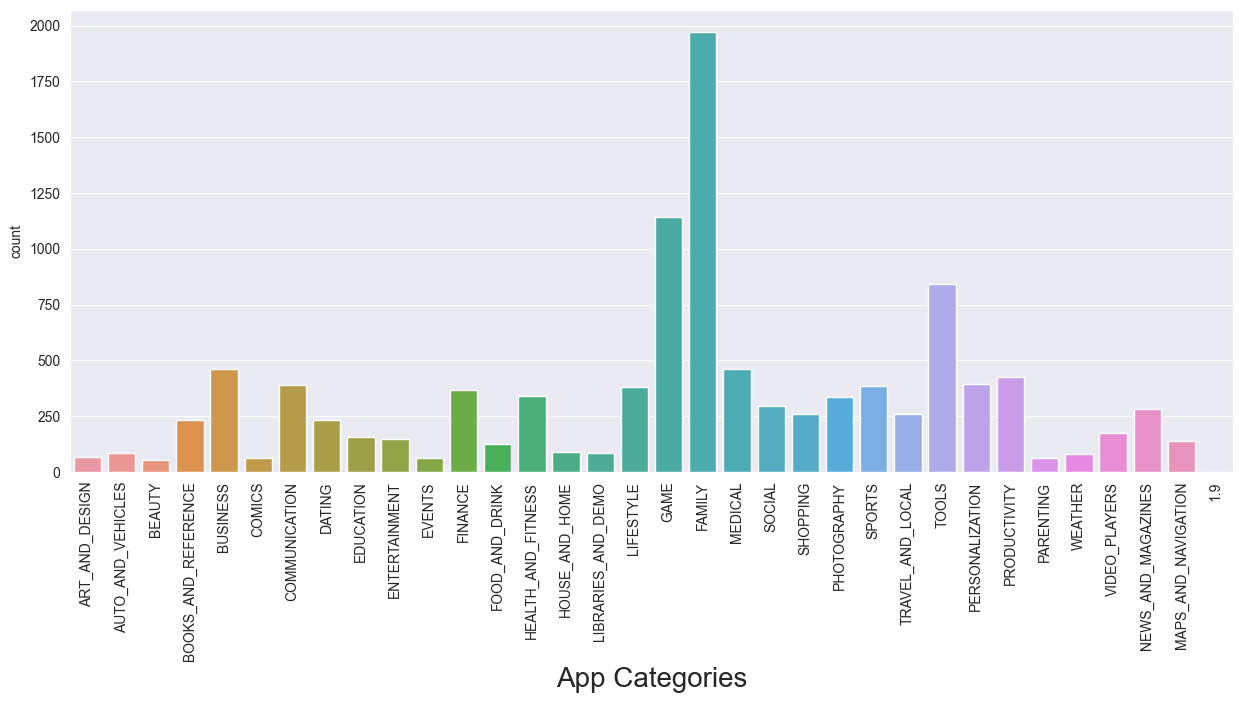

In [33]:
plt.figure(figsize=(15,6))

sns.countplot(x='Category',data=df1)
plt.xlabel('App Categories',fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Conclusion
- Family, Game, Tools, Business and productivity are some of the most popular app categories